In [40]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns

In [2]:
df = pd.read_csv("W:\cienciadedados\Correlacao_de_fundos\Bases\Book8_paiva.csv",delimiter=';',decimal=',',parse_dates=True)

In [3]:
#Fundo a ser analisado
nome_do_fundo = 'paiva'
coldata = "data"
nome_benchmark = "ibov"

In [4]:
#Calculo das colunas temporais
df[coldata]=pd.to_datetime(df[coldata],format = '%d/%m/%Y')
df['MesAno'] = df[coldata].dt.strftime('%m-%Y')
df['Mes']=df[coldata].dt.strftime('%m')
df['Ano']=df[coldata].dt.strftime('%Y')
df.sort_values(by=["Product",coldata],ascending=False,inplace=True)


In [13]:
#Cria a coluna retorno e seta NaN na primeira linha de cada fundo
df["Retorno_1"] = (df.FinancialPrice.shift())/(df.FinancialPrice)
df.loc[df.drop_duplicates('Product').index.values,'Retorno_1'] = np.NaN
df['Retorno'] = df.Retorno_1.shift(periods=-1)
df['Retorno'] = (df["Retorno_1"]-1)*100


In [17]:
df_fundo

,Product,FinancialPrice,data,MesAno,Mes,Ano,Retorno_1
0,paiva,4.470,2021-08-12,08-2021,08,2021,nan
1,paiva,4.483,2021-08-11,08-2021,08,2021,0.997
2,paiva,4.502,2021-08-10,08-2021,08,2021,0.996
3,paiva,4.527,2021-08-09,08-2021,08,2021,0.994
4,paiva,4.515,2021-08-06,08-2021,08,2021,1.003
...,...,...,...,...,...,...,...
1722,paiva,1.497,2015-01-06,01-2015,01,2015,1.008
1723,paiva,1.492,2015-01-05,01-2015,01,2015,1.003
1724,paiva,1.507,2015-01-02,01-2015,01,2015,0.990
1725,paiva,1.526,2015-01-01,01-2015,01,2015,0.988


In [18]:
df_fundo = df[df.Product == nome_do_fundo]

In [7]:
#Retorno Mensal
pivot_table = pd.pivot_table(df_fundo,index=['Ano'],values=["Retorno_1"],fill_value=1,aggfunc='prod',columns=['Mes'])#,margins=True,margins_name="Year")

In [8]:
pivot_table = (pivot_table * 100 - 100)#.iloc[:-1]

In [10]:
# backgroung color mapping
print("\nDataframe - Gradient color:")
from  matplotlib.colors import LinearSegmentedColormap
my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 

pd.options.display.float_format = "{:,.3f}".format

pivot_table.style.background_gradient(cmap=my_cmap,vmin = -20,vmax = 20)


Dataframe - Gradient color:


In [11]:
#Retorno Anualizado (Media Geometrica dos retornos anuais vinda de precos diarios)
retorno_anualizado = (df_fundo["Retorno_1"].product()**(252/float(df_fundo["Product"].count())) - 1) * 100
retorno_anualizado

16.978895602283185

In [19]:
#Volatilidade anualizada
vol_anualizada = df_fundo["Retorno"].std() * (252**(1/2))
vol_anualizada

21.522976579490905

In [20]:
#Sharpe
retorno_anualizado / vol_anualizada #.67 

0.7888730231887283

In [46]:
#Max DrawDown historico
x=df.FinancialPrice[df.Product == nome_do_fundo]
max(x)/float(min(x))-1

2.2044468583501122

In [21]:
#Max drawdown mensal
df.groupby(['MesAno','Product']).agg({"FinancialPrice":  lambda x: max(x)/float(min(x))-1})

FinancialPrice
MesAno  Product                
01-2015 ibov              0.066
        paiva             0.032
01-2016 ibov              0.156
        paiva             0.058
01-2017 ibov              0.111
...                         ...
12-2018 paiva             0.032
12-2019 ibov              0.076
        paiva             0.102
12-2020 ibov              0.072
        paiva             0.050

[162 rows x 1 columns]

In [22]:
#Descritivas mensais
#df[['Product','MesAno']].groupby(['MesAno','Product']).agg(['mean', 'min', 'max','std','count'])
df.groupby(['Product']).describe()
df.groupby(['MesAno','Product']).describe()

FinancialPrice                                                \
                         count        mean       std         min         25%   
MesAno  Product                                                                
01-2015 ibov            22.000  48,443.764   824.496  46,907.700  47,790.825   
        paiva           22.000       1.494     0.012       1.479       1.484   
01-2016 ibov            21.000  39,514.171 1,758.294  37,497.500  38,031.200   
        paiva           21.000       1.504     0.024       1.471       1.486   
01-2017 ibov            22.000  63,638.409 1,791.775  59,588.700  62,086.200   
...                        ...         ...       ...         ...         ...   
12-2018 paiva           21.000       2.617     0.027       2.581       2.592   
12-2019 ibov            22.000 113,136.682 2,621.767 108,927.800 110,967.225   
        paiva           22.000       3.860     0.125       3.653       3.743   
12-2020 ibov            23.000 115,976.048 2,551.449 111,399.900 113,771.650   
        paiva           23.000       4.193     0.073       4.083       4.127   

                                                    Retorno_1        ...  \
                        50%         75%         max     count  mean  ...   
MesAno  Product                                                      ...   
01-2015 ibov     48,325.950  48,972.450  50,007.400    22.000 0.998  ...   
        paiva         1.492       1.500       1.526    22.000 0.999  ...   
01-2016 ibov     38,944.400  40,612.200  43,350.000    21.000 0.997  ...   
        paiva         1.498       1.518       1.557    21.000 1.000  ...   
01-2017 ibov     63,952.400  64,633.400  66,190.600    22.000 1.004  ...   
...                     ...         ...         ...       ...   ...  ...   
12-2018 paiva         2.606       2.638       2.662    21.000 1.000  ...   
12-2019 ibov    112,590.300 115,645.300 117,203.200    22.000 1.003  ...   
        paiva         3.864       3.987       4.025    22.000 1.004  ...   
12-2020 ibov    116,148.600 117,940.550 119,409.200    23.000 1.003  ...   
        paiva         4.209       4.252       4.288    23.000 1.002  ...   

                            Retorno                                          \
                  75%   max   count   mean   std    min    25%    50%   75%   
MesAno  Product                                                               
01-2015 ibov    1.009 1.030  22.000 -0.205 1.717 -2.990 -1.700 -0.087 0.928   
        paiva   1.003 1.013  22.000 -0.091 0.718 -1.406 -0.475 -0.089 0.318   
01-2016 ibov    1.007 1.046  21.000 -0.300 1.771 -2.789 -1.523 -0.203 0.660   
        paiva   1.005 1.023  21.000 -0.047 0.934 -2.084 -0.724 -0.040 0.548   
01-2017 ibov    1.008 1.037  22.000  0.391 1.226 -2.623 -0.291  0.269 0.762   
...               ...   ...     ...    ...   ...    ...    ...    ...   ...   
12-2018 paiva   1.005 1.022  21.000  0.009 0.826 -1.516 -0.309  0.000 0.550   
12-2019 ibov    1.006 1.015  22.000  0.274 0.613 -0.763 -0.007  0.145 0.644   
        paiva   1.009 1.013  22.000  0.402 0.546 -0.482  0.000  0.325 0.867   
12-2020 ibov    1.009 1.019  23.000  0.291 0.826 -1.865 -0.071  0.179 0.853   
        paiva   1.006 1.014  23.000  0.209 0.644 -1.026 -0.023  0.122 0.608   

                       
                  max  
MesAno  Product        
01-2015 ibov    3.046  
        paiva   1.257  
01-2016 ibov    4.597  
        paiva   2.296  
01-2017 ibov    3.734  
...               ...  
12-2018 paiva   2.217  
12-2019 ibov    1.509  
        paiva   1.320  
12-2020 ibov    1.883  
        paiva   1.420  

[162 rows x 24 columns]

BIVARIADA- Paiva

In [23]:
df_fundo = df.loc[df.Product == nome_do_fundo,[coldata,'Retorno']]
df_bench = df.loc[df.Product == nome_benchmark,[coldata,'Retorno']]

df_fundo.index=df_fundo[coldata]
df_bench.index=df_bench[coldata]


In [24]:
df_join =pd.merge(df_bench, df_fundo,how='inner',left_index=True, right_index=True).dropna()[['Retorno_x','Retorno_y']]

In [25]:
df_join

,Retorno_x,Retorno_y
data,,
2021-08-11,-1.110,-0.295
2021-08-10,-0.120,-0.408
2021-08-09,-0.664,-0.564
2021-08-06,0.170,0.277
2021-08-05,0.968,0.438
...,...,...
2015-01-06,3.046,0.805
2015-01-05,1.019,0.330
2015-01-02,-2.052,-1.035


In [26]:
#Regressao Linear total
x = (df_join['Retorno_x']-1).values.reshape((-1, 1))
y= (df_join['Retorno_y']-1).values.reshape((-1, 1))
regr = sklearn.linear_model.LinearRegression()
regr.fit(x, y)


LinearRegression()

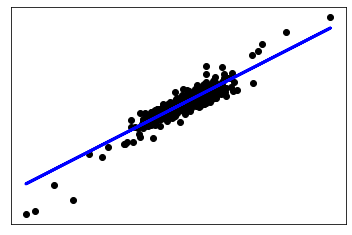

In [27]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [29]:
# The coefficients
print('Beta: \n', regr.coef_)
print('Alpha: \n',regr.intercept_)
#Score R^2
print('R^2: \n',regr.score(x, y))
# The mean squared error
print('Mean squared error: %.8f' % sklearn.metrics.mean_squared_error(x, regr.predict(x)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.8f' % sklearn.metrics.r2_score(x, regr.predict(x)))

Beta: 
 [[0.76123683]]
Alpha: 
 [-0.21615178]
R^2: 
 0.8354722140280378
Mean squared error: 0.15105310
Coefficient of determination: 0.94297244


In [ ]:
Regressao Linear Up Capture

In [ ]:
#Regressao Linear modelo
df_join = df_join[df_join[nome_do_fundo+'_retorno'] >= 1]

x = df_join[nome_do_fundo+'_retorno'].values.reshape((-1, 1))
y= df_join[nome_benchmark+'_retorno'].values.reshape((-1, 1))
regr_up = sklearn.linear_model.LinearRegression()
regr_up.fit(x, y)

In [ ]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Mutual Information para variavel continua
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html

In [37]:
sklearn.feature_selection.mutual_info_regression(x,df_join['Retorno_y']-1)

array([0.9970214])

Correlacao de pearson

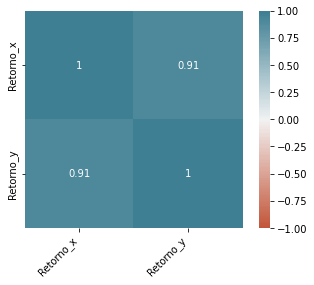

In [43]:
corr = df_join.corr()
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);